# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [2]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [3]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class Node23:
    def __init__(self, is_leaf=True):
        self.keys = []
        self.children = []
        self.is_leaf = is_leaf

class NodeAVL:
    def __init__(self, key, parent=None):
        self.key = key
        self.left = None
        self.right = None
        self.parent = parent
        self.height = 1

class BTreeNode:
    def __init__(self, keys=None, children=None, parent=None):

        self.keys = keys if keys is not None else []
        self.children = children if children is not None else []
        self.parent = parent

    def get_keys(self):
        return self.keys

    def get_children(self):
        return self.children

    def get_parent(self):
        return self.parent
    

Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [4]:
class TwoThreeTree(AbstractSearchInterface):
    def __init__(self):
        self.root = None

    def searchElement(self, key):
        if self.root is None:
            return False
        else:
            return self.search_recursively(self.root,key)

    def insertElement(self, key):
        if self.root is None:
            self.root = Node23(is_leaf=True)
            self.root.keys.append(key)
            return True
        success, promotion = self.insert_recursively(self.root, key)
        if not success:
            return False
        if promotion is not None: # deal with the root
            mid_key, new_left, new_right = promotion
            new_root = Node23(is_leaf=False)
            new_root.keys.append(mid_key)
            new_root.children = [new_left, new_right]
            self.root = new_root
        return True

    def insert_recursively(self, node, key):
        if key in node.keys:
            return (False, None)

        if node.is_leaf :
            self.insert_to_left(node, key)
            if len(node.keys) > 2:
                promotion = self.split_leaf(node)
                return (True, promotion)
            return (True, None)
        else :
            children_index = self.find_children_index(node,key)
            success, promotion = self.insert_recursively(node.children[children_index],key)
            if not success:
                return (False, None)
            if promotion is not None: #deal with the parent node in each lays
                mid_key,new_left,new_right = promotion
                self.merge(node,mid_key,new_left,new_right)
                if len(node.keys) > 2:
                    promotion_internal = self.split_internal(node)
                    return (True, promotion_internal)
            return (True, None)

    def split_leaf(self, node):
        mid_key = node.keys[1]
        new_left = Node23(is_leaf=True)
        new_left.keys.append(node.keys[0])
        new_left.children = []
        new_right = Node23(is_leaf=True)
        new_right.keys.append(node.keys[2])
        new_right.children = []
        return mid_key,new_left,new_right

    def split_internal(self, node):
        mid_key = node.keys.pop(1)
        new_left = Node23(is_leaf=False)
        new_left.keys.append(node.keys[0])
        new_left.children =node.children[0:2]
        new_right = Node23(is_leaf=False)
        new_right.keys.append(node.keys[1])
        new_right.children =node.children[2:]
        return mid_key,new_left,new_right

    def merge(self, node, mid_key, new_left, new_right):
        idx = self.find_children_index(node, mid_key)
        node.keys.insert(idx, mid_key)
        node.children[idx] =new_left
        node.children.insert(idx + 1, new_right)

    def insert_to_left(self, node, key):
        idx = 0
        while idx < len(node.keys) and key > node.keys[idx]:
            idx += 1
        node.keys.insert(idx, key)

    def find_children_index(self, node, key):
        idx = 0
        while idx < len(node.keys) and key > node.keys[idx]:
            idx += 1
        return idx

    def search_recursively(self, node, key):
         n = len(node.keys)
         for idx in range(n):
            if node.keys[idx] == key:
                return True
         if node.is_leaf :
            return False
         else:
            children_index = self.find_children_index(node, key)
            return self.search_recursively(node.children[children_index],key)

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [5]:
class AVLTree(AbstractSearchInterface):
    inserted = True

    def __init__(self):
        self.root = None

    def getHeight(self, node):
        return node.height if node else 0

    def getBalanceFactor(self, node):
        if not node:
            return 0
        return self.getHeight(node.left) - self.getHeight(node.right)

    def updateHeight(self, node):
        if node:
            node.height = 1 + max(self.getHeight(node.left), self.getHeight(node.right))

    def leftRotate(self, node):

        rightChild = node.right
        if not rightChild:
            return node

        T2 = rightChild.left

        rightChild.left = node
        node.right = T2

        rightChild.parent = node.parent
        node.parent = rightChild
        if T2:
            T2.parent = node

        if rightChild.parent is None:
            self.root = rightChild
        else:
            if rightChild.parent.left == node:
                rightChild.parent.left = rightChild
            else:
                rightChild.parent.right = rightChild

        self.updateHeight(node)
        self.updateHeight(rightChild)
        return rightChild

    def rightRotate(self, node):
        leftChild = node.left
        if not leftChild:
            return node

        T2 = leftChild.right

        leftChild.right = node
        node.left = T2

        leftChild.parent = node.parent
        node.parent = leftChild
        if T2:
            T2.parent = node

        if leftChild.parent is None:
            self.root = leftChild
        else:
            if leftChild.parent.left == node:
                leftChild.parent.left = leftChild
            else:
                leftChild.parent.right = leftChild

        self.updateHeight(node)
        self.updateHeight(leftChild)
        return leftChild

    def insert(self, key):
        self.root = self._insert(self.root, key, parent=None)

    def _insert(self, node, key, parent):
        global inserted
        if not node:
            return NodeAVL(key, parent)
        if key < node.key:
            node.left = self._insert(node.left, key, node)
        elif key > node.key:
            node.right = self._insert(node.right, key, node)
        else:
            # Duplicate keys are not allowed
            inserted = False
            return node

        self.updateHeight(node)
        balance = self.getBalanceFactor(node)

        # Left Left Case
        if balance > 1 and node.left and key < node.left.key:
            return self.rightRotate(node)
        # Right Right Case
        if balance < -1 and node.right and key > node.right.key:
            return self.leftRotate(node)
        # Left Right Case
        if balance > 1 and key > node.left.key:
            node.left = self.leftRotate(node.left)
            return self.rightRotate(node)
        # Right Left Case
        if balance < -1 and key < node.right.key:
            node.right = self.rightRotate(node.right)
            return self.leftRotate(node)

        return node

    def print_tree(self,node, level=0):
        if node is None:
            return
        print(f"Level {level}: {node.key}")
        self.print_tree(node.right, level + 1)
        self.print_tree(node.left, level + 1)
        
    def insertElement(self, element):
        global inserted 
        inserted = True
        # ADD YOUR CODE HERE
        self.insert(element)
        return inserted
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        node = self.root
        while node:
            if node.key == element:
                found = True
                break
            elif element < node.key:
                node = node.left
            else:
                node = node.right
        
        return found  

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [6]:
class LLRBBST(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found  

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [26]:
class BTree(AbstractSearchInterface):
    """
    max_keys refers to the maximum possible keys held by a node 
    For this BTree implementation we set max_keys arbitrary to 4 by default, however this can be overriden"
    """
    def __init__(self, max_keys=4):
        self.root_node = BTreeNode()
        self.max_keys = max_keys

    def insertElement(self, element):
        inserted = False
        # No need to insert the element if its already present
        if self.searchElement(element):
            return inserted
        self.insert(element, self.root_node)
        return True

    def splitNode(self, node):

        node_keys = node.get_keys()
        node_children = node.get_children()
        mid_idx = len(node_keys) // 2

        left_child_keys = node_keys[:mid_idx]
        median_key = node_keys[mid_idx]
        right_child_keys = node_keys[mid_idx + 1:]

        # Assign children correctly for an internal node
        left_children = node_children[:mid_idx + 1] if node_children else []
        right_children = node_children[mid_idx + 1:] if node_children else []


        left_child = BTreeNode(keys=left_child_keys, children=left_children, parent=None)
        right_child = BTreeNode(keys=right_child_keys, children=right_children, parent=None)

        for child in left_child.get_children():
            child.parent = left_child
        for child in right_child.get_children():
            child.parent = right_child

        #Case 1 : node is root node, thus we create a new node to become the parent node and thus the new root node
        if node == self.root_node:
            new_root = BTreeNode(keys=[median_key], children=[left_child, right_child])
            left_child.parent = new_root
            right_child.parent = new_root
            self.root_node = new_root
            return

        # Case 2: Non-root node, we insert median key into parent node and append the new nodes into parent node's children
        parent = node.get_parent()
        parent_keys = parent.get_keys()
        parent_children = parent.get_children()

        idx = 0
        while idx < len(parent_keys) and parent_keys[idx] < median_key:
            idx += 1

        parent_keys.insert(idx, median_key)

        # Remove the pointer to the split node and insert the two new children.
        parent_children.pop(idx)
        left_child.parent = parent
        right_child.parent = parent
        parent_children.insert(idx, left_child)
        parent_children.insert(idx + 1, right_child)

        # Recursively split the parent if needed.
        if len(parent_keys) >= self.max_keys:
            self.splitNode(parent)

            return  # Exit to prevent crash
    def insert(self, element, node):
        node_children = node.get_children()
        node_keys = node.get_keys()

        # Leaf Node: insert element and split if necessary
        if not node_children:  
            idx = 0
            while idx < len(node_keys) and node_keys[idx] < element:
                idx += 1
            node_keys.insert(idx, element)
            if len(node_keys) >= self.max_keys:
                self.splitNode(node)
            return

        # Find the correct child node
        idx = 0
        while idx < len(node_keys) and node_keys[idx] < element:
            idx += 1

        # Ensure idx does not exceed node_children bounds
        if idx >= len(node_children):
            print(f"Warning: idx {idx} is out of bounds for node_children (size {len(node_children)}).")
            return  # Exit to prevent crash
        
        self.insert(element, node_children[idx])

    def searchElement(self, element):
        return self.search(element, self.root_node)


    def search(self, element, node):

        #Case 1: Element is in current node's keys, we return true immediately
        node_keys = node.get_keys()
        if element in node_keys:
            return True

        #Case 2: Element is not in current node's keys is a leaf node, hence we return false as there are no more children
        node_children = node.get_children()
        if not node_children:
            return False

        #We recursively call search() on the appropriate child node
        idx = 0
        while idx < len(node_keys):
            if node_keys[idx] > element:
                break
            idx += 1

        if idx >= len(node_children):
            return False

        return self.search(element, node_children[idx])

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [8]:
class ScapegoatTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found 

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [9]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a collection of random dataset generators

    '''
    
    #ADD YOUR CODE HERE
    
    def __init__(self):
        pass
        
    def generate_random_string(self, length: int) -> str:
        return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))
    
    def generate_dataset(self, n: int, str_length: int = 10) -> list[str]:
        """Generate a dataset of n unique random strings"""
        unique_strings = set()
        while len(unique_strings) < n:
            unique_strings.add(self.generate_random_string(str_length))
        return list(unique_strings)
    
    def load_dataset_from_file(self,file_path: str) -> list[str]:
        """Load a dataset from a file"""
        with open(file_path, 'r') as file:
            dataset = [line.strip() for line in file.readlines()]
        return dataset
    
    def generate_dataset_normal_distribution(self,n: int, str_length: int = 10) -> list[str]:
        """Generate a dataset of n unique random strings with a normal distribution"""
        mean = n // 2
        std_dev = n // 4
        dataset = []
        for _ in range(n):
            dataset.append(str(int(random.gauss(mean, std_dev)))) 
        return dataset
    
    def generate_dateset_with_duplicates(self,n: int, str_length: int = 10) -> list[str]:
        """Generate a dataset of n unique random strings with duplicates"""
        dataset = self.generate_dataset(9*n//10, str_length)
        duplicates = random.sample(dataset, n - (9 * n // 10))  # 10% duplicates
        dataset.extend(duplicates)
        return dataset
    
    def generate_sorted_dataset(self,n: int, str_length: int = 10, reverse = False) -> list[str]:
        """Generate a sorted dataset of n unique random strings"""
        """Represent edge cases for the dataset"""
        dataset = self.generate_dataset(n, str_length)
        dataset.sort(reverse=reverse)
        return dataset

        

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [24]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    '''
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    '''
            
    #ADD YOUR CODE HERE
    
    def __init__(self):
        pass
        
    def benchmark_insertion(self, data_structure, dataset: list[str]) -> float:
        '''
        Benchmark the insertion time of a data structure.
        '''
        start_time = timeit.default_timer()
        for element in dataset:
            data_structure.insertElement(element)
        end_time = timeit.default_timer()
        return end_time - start_time

    def benchmark_search(self, data_structure, dataset: list[str]) -> tuple[float, float]:
        '''
        Benchmark the search time of a data structure for both existing and non-existing elements.
        '''
        # Search for existing elements
        start_time = timeit.default_timer()
        for element in dataset:
            data_structure.searchElement(element)
        end_time = timeit.default_timer()
        existing_search_time = end_time - start_time
        
        # Search for non-existing elements
        non_existing_elements = [f"non_existing_{i}" for i in range(len(dataset))]
        start_time = timeit.default_timer()
        for element in non_existing_elements:
            data_structure.searchElement(element)
        end_time = timeit.default_timer()
        non_existing_search_time = end_time - start_time
        return existing_search_time, non_existing_search_time
    
    def plot_results(self, results: dict[str, dict[str, dict[int, float]]], title: str = "Performance of Datastructures"):

        '''
        results is a dictionary with the following structure:
        {
            'DataStructure1': {
                'insertion': {size: time},
                'existing_search': {size: time},
                'non_existing_search': {size: time}
            },
            'DataStructure2': {
                ...
            }
        }
        '''
        # Extract data for plotting
        data_structures = list(results.keys())
        insertion_times = {ds: [] for ds in data_structures}
        existing_search_times = {ds: [] for ds in data_structures}
        non_existing_search_times = {ds: [] for ds in data_structures}
        dataset_sizes = sorted(results[data_structures[0]]['insertion'].keys())
        for ds in data_structures:
            for size in dataset_sizes:
                insertion_times[ds].append(results[ds]['insertion'][size])
                existing_search_times[ds].append(results[ds]['existing_search'][size])
                non_existing_search_times[ds].append(results[ds]['non_existing_search'][size])
        
        # Plotting
        def plot_ax(data_structures, ax, title, operation_times=None):
            for ds in data_structures:
                ax.plot(dataset_sizes, operation_times[ds], label=ds)
            ax.set_title(title)
            ax.set_xlabel('Dataset Size')
            ax.set_ylabel('Time (seconds)')
            # ax.set_xscale('log')
            # ax.set_yscale('log')
            ax.legend()

        fig, axs = plt.subplots(3, 1, figsize=(10, 15))
        fig.suptitle(title)
        fig.subplots_adjust(hspace=0.4)
        # Insertion Times
        plot_ax(data_structures, axs[0], 'Insertion Times', operation_times=insertion_times)
        # Existing Search Times
        plot_ax(data_structures, axs[1], 'Existing Search Times', operation_times=existing_search_times)
        # Non-existing Search Times
        plot_ax(data_structures, axs[2], 'Non-existing Search Times', operation_times=non_existing_search_times)
        plt.show()
        
    def run_experiments(self, data_structures: list[AbstractSearchInterface], dataset_sizes: list[int], dataset_generator):
        results = {ds.__name__: {'insertion': {}, 'existing_search': {}, 'non_existing_search': {}} for ds in data_structures}
        for size in dataset_sizes:
            dataset = dataset_generator(size) 
            # Use the same dataset for all data structures
            for ds in data_structures:
                ds_name = ds.__name__
                # Create a new instance of the data structure
                ds_instance = ds()
                insertion_time = self.benchmark_insertion(ds_instance, dataset)
                existing_search_time, non_existing_search_time = self.benchmark_search(ds_instance, dataset)
                results[ds_name]['insertion'][size] = insertion_time
                results[ds_name]['existing_search'][size] = existing_search_time
                results[ds_name]['non_existing_search'][size] = non_existing_search_time
        return results

    def plot_multiple_results(self, results_collection, title="Performance of Datastructures"):
        """
        Plot results from multiple runs as discrete points
        
        results_collection: A list of result dictionaries from different runs
        """
        # Extract data for plotting
        data_structures = list(results_collection[0].keys())
        dataset_sizes = sorted(results_collection[0][data_structures[0]]['insertion'].keys())
        
        fig, axs = plt.subplots(3, 1, figsize=(10, 15))
        fig.suptitle(title)
        fig.subplots_adjust(hspace=0.4)
        
        operations = ['insertion', 'existing_search', 'non_existing_search']
        operation_titles = ['Insertion Times', 'Existing Search Times', 'Non-existing Search Times']
        
        # Colors for each data structure
        colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
        markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
        
        for op_idx, operation in enumerate(operations):
            ax = axs[op_idx]
            ax.set_title(operation_titles[op_idx])
            ax.set_xlabel('Dataset Size')
            ax.set_ylabel('Time (seconds)')
            ax.grid(True, alpha=0.3)
            
            # Keep track of data structure names for legend
            handles = []
            labels = []
            
            for ds_idx, ds in enumerate(data_structures):
                # Plot averages as lines (optional)
                avg_times = {size: 0 for size in dataset_sizes}
                for run_results in results_collection:
                    for size in dataset_sizes:
                        avg_times[size] += run_results[ds][operation][size]
                
                for size in dataset_sizes:
                    avg_times[size] /= len(results_collection)
                    
                # line, = ax.plot(dataset_sizes, [avg_times[size] for size in dataset_sizes], 
                #             color=colors[ds_idx % len(colors)], alpha=0.5)
                
                # Plot individual runs as discrete points
                for run_idx, run_results in enumerate(results_collection):
                    scattered = ax.scatter(dataset_sizes, 
                                        [run_results[ds][operation][size] for size in dataset_sizes],
                                        color=colors[ds_idx % len(colors)],
                                        marker=markers[run_idx % len(markers)],
                                        s=30, alpha=0.7)
                    
                    # Only add to legend for the first operation (to avoid duplication)
                    if op_idx == 0 and run_idx == 0:
                        # handles.append(line)
                        labels.append(ds)
            
            ax.legend(handles, labels)
        
        plt.tight_layout()
        plt.show()


Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

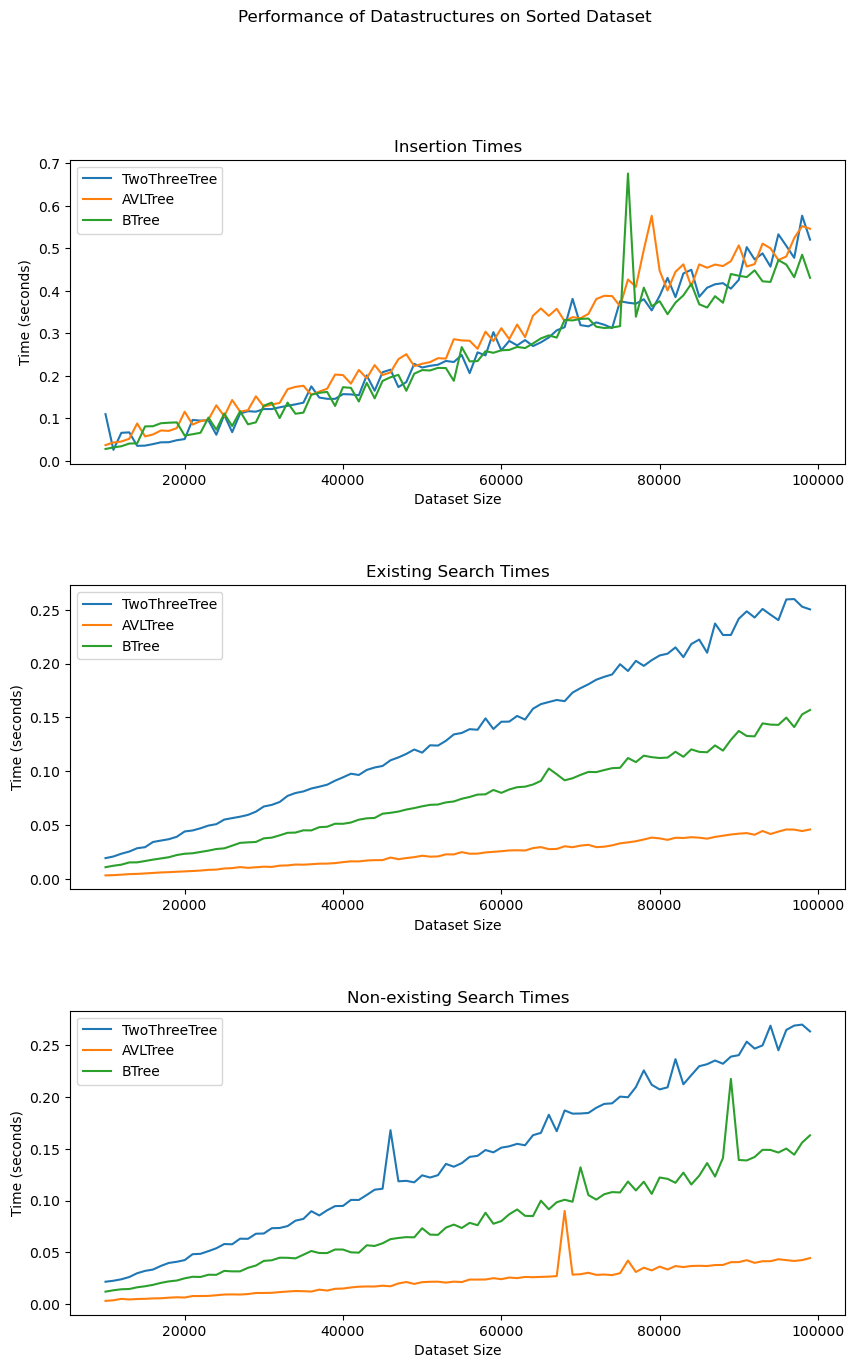

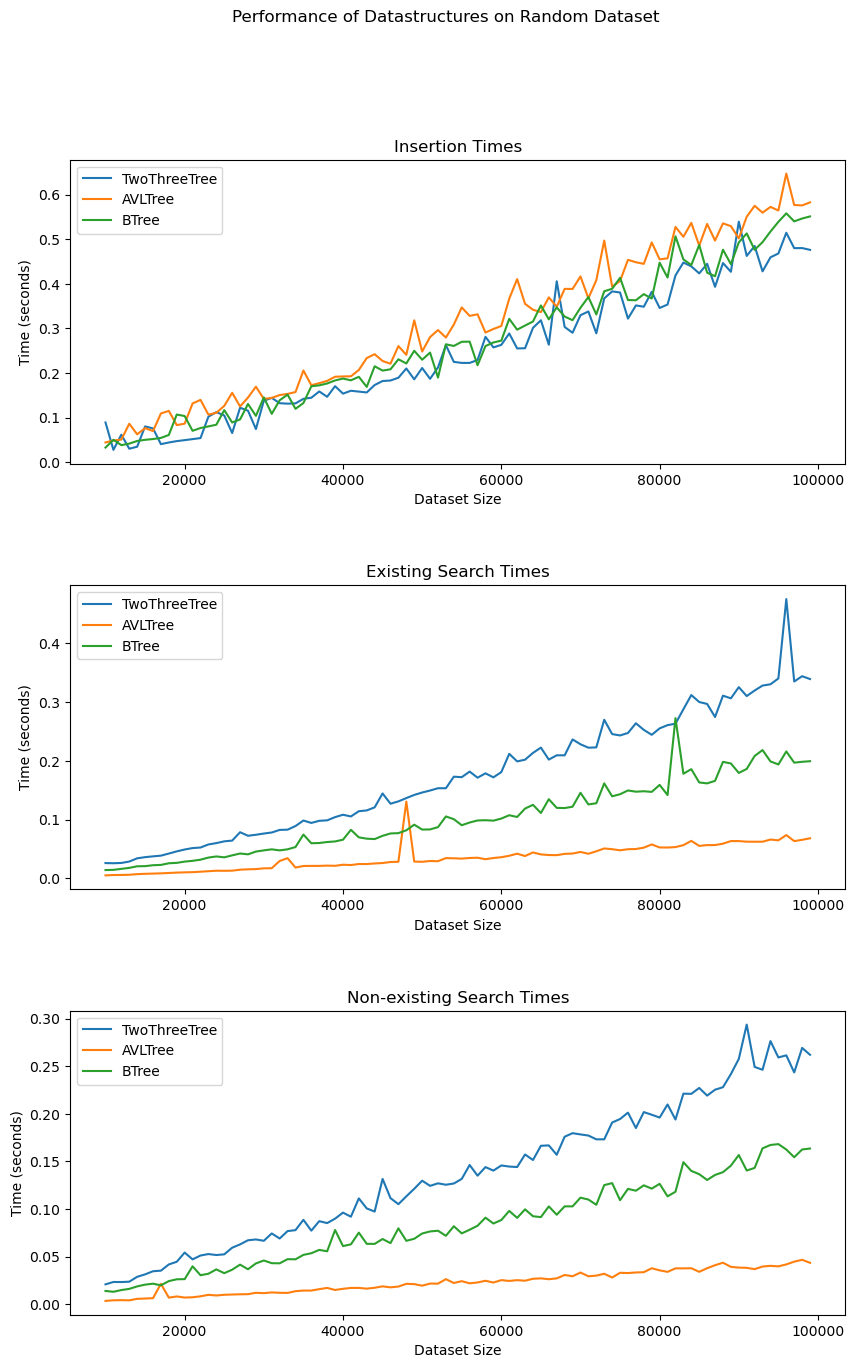

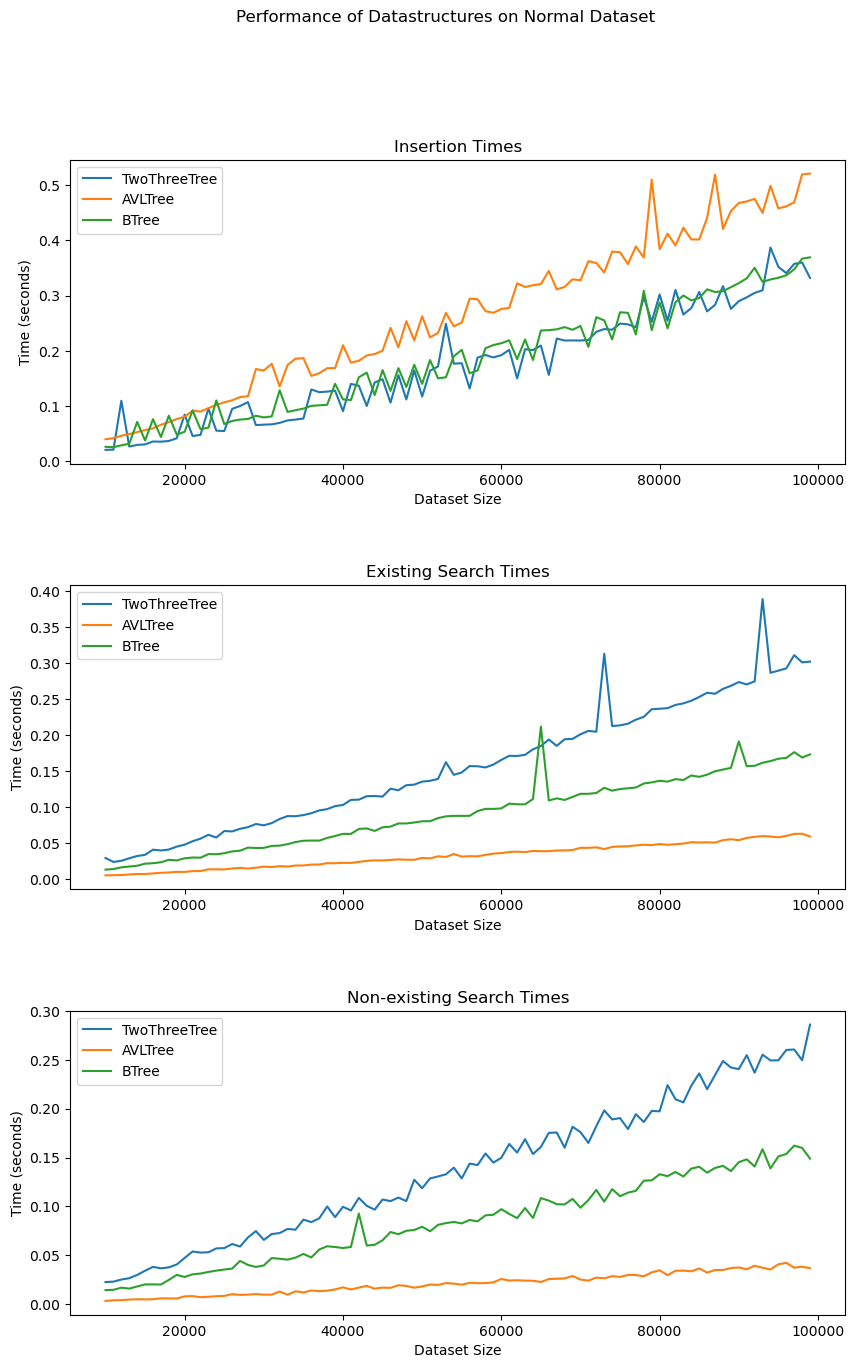

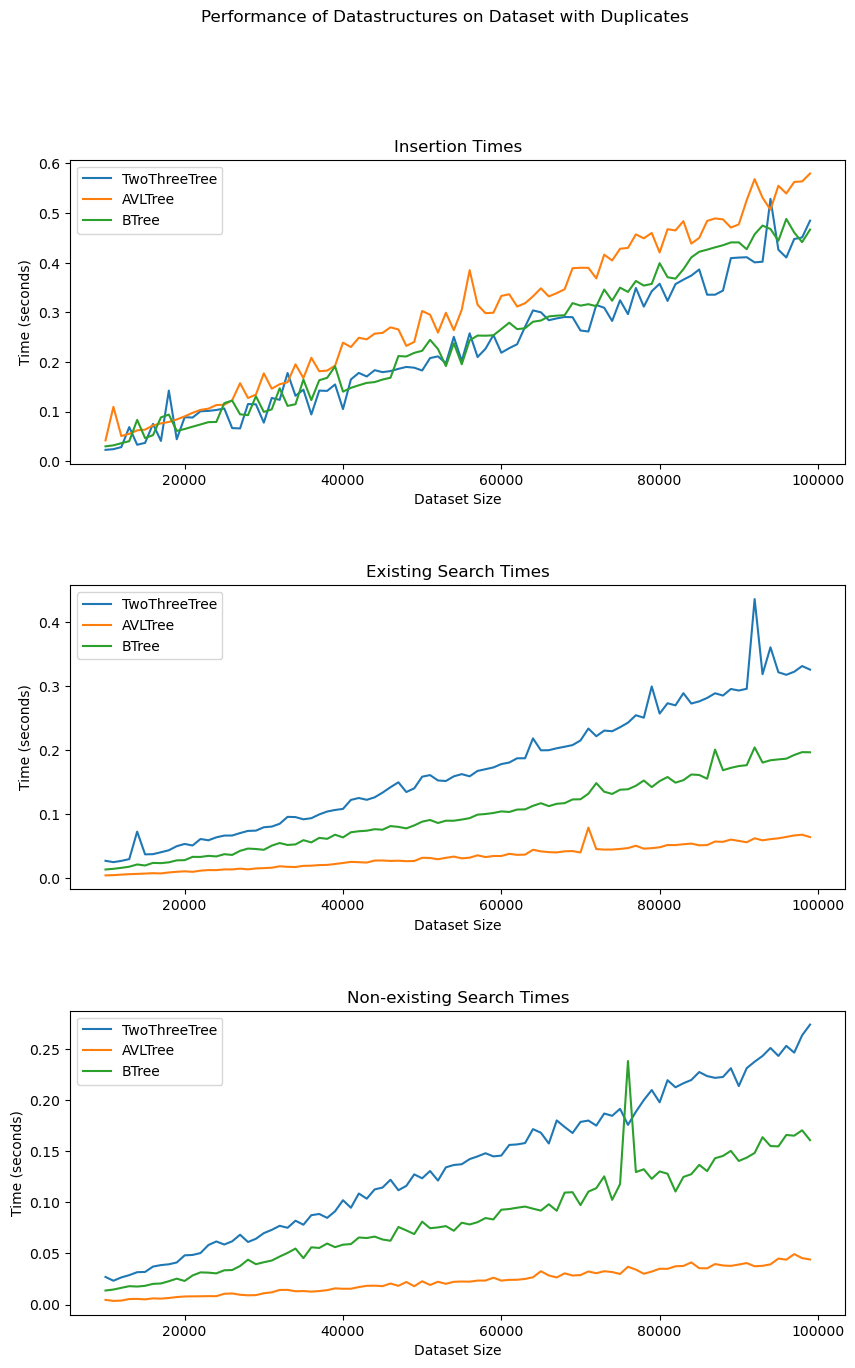

In [27]:
# ADD YOUR TEST CODE HERE 
data_structures = [TwoThreeTree, AVLTree, BTree]
dataset_sizes = [x for x in range(10000, 100000, 1000)]

random_data_generator = TestDataGenerator().generate_sorted_dataset
test_framework = ExperimentalFramework()
results_on_sorted = test_framework.run_experiments(data_structures, dataset_sizes, random_data_generator)
test_framework.plot_results(results_on_sorted, title="Performance of Datastructures on Sorted Dataset")

random_data_generator = TestDataGenerator().generate_dataset
test_framework = ExperimentalFramework()
results_on_random = test_framework.run_experiments(data_structures, dataset_sizes, random_data_generator)
test_framework.plot_results(results_on_random, title="Performance of Datastructures on Random Dataset")

random_data_generator = TestDataGenerator().generate_dataset_normal_distribution
test_framework = ExperimentalFramework()    
results_on_normal_dis = test_framework.run_experiments(data_structures, dataset_sizes, random_data_generator)
test_framework.plot_results(results_on_normal_dis, title="Performance of Datastructures on Normal Dataset")

random_data_generator = TestDataGenerator().generate_dateset_with_duplicates
test_framework = ExperimentalFramework()
results_on_dup = test_framework.run_experiments(data_structures, dataset_sizes, random_data_generator)
test_framework.plot_results(results_on_dup, title="Performance of Datastructures on Dataset with Duplicates")
    
        




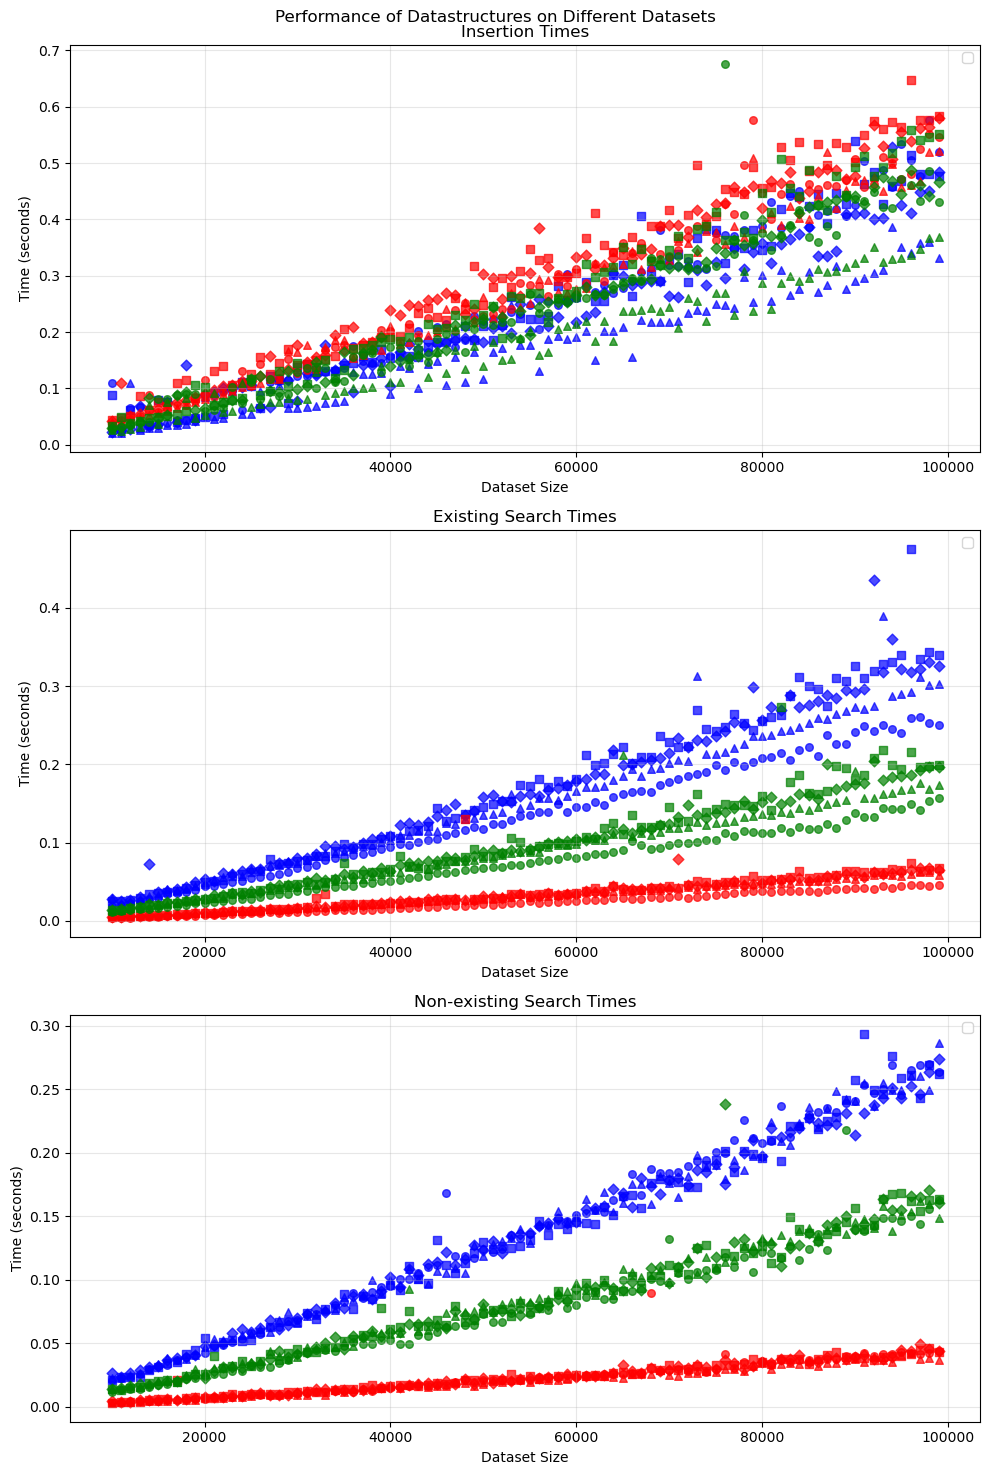

In [28]:
all_results = [results_on_sorted, results_on_random, results_on_normal_dis, results_on_dup]
ExperimentalFramework().plot_multiple_results(all_results, title="Performance of Datastructures on Different Datasets")